In [11]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [2]:
from sqlite3 import connect

conn = connect("../db.sqlite3")

In [15]:

df = pd.read_sql("SELECT "
                 "restaurant_order.id AS order_id, "
                 "restaurant_order.datetime AS order_datetime, "
                 "restaurant_product.id AS product_id, "
                 "restaurant_product.price AS product_price, "
                 "restaurant_product.name AS product_name, "
                 "restaurant_orderitem.quantity AS product_quantity "
                 "FROM restaurant_orderitem "
                 "INNER JOIN restaurant_order "
                 "ON restaurant_orderitem.order_id = restaurant_order.id "
                 "INNER JOIN restaurant_product "
                 "ON restaurant_orderitem.product_id = restaurant_product.id "
                 , conn)
df.to_csv("restaurant_order.csv", index=False)



In [51]:
df.shape

(74818, 6)

In [52]:
df.head()

,order_id,order_datetime,product_id,product_price,product_name,product_quantity
0,1,2019-08-03 20:25:00,6,0.80,Plain Papadum,2
1,1,2019-08-03 20:25:00,240,12.95,King Prawn Balti,1
2,1,2019-08-03 20:25:00,19,2.95,Garlic Naan,1
3,1,2019-08-03 20:25:00,36,3.95,Mushroom Rice,1
4,1,2019-08-03 20:25:00,111,8.95,Paneer Tikka Masala,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          74818 non-null  int64  
 1   order_datetime    74818 non-null  object 
 2   product_id        74818 non-null  int64  
 3   product_price     74818 non-null  float64
 4   product_name      74818 non-null  object 
 5   product_quantity  74818 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.4+ MB


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

In [8]:
product_quantity = df.groupby('product_name')['product_quantity'].sum()
top_10_products = product_quantity.sort_values(ascending=False).head(10)
popularity_percentage = (top_10_products / top_10_products.sum()) * 100


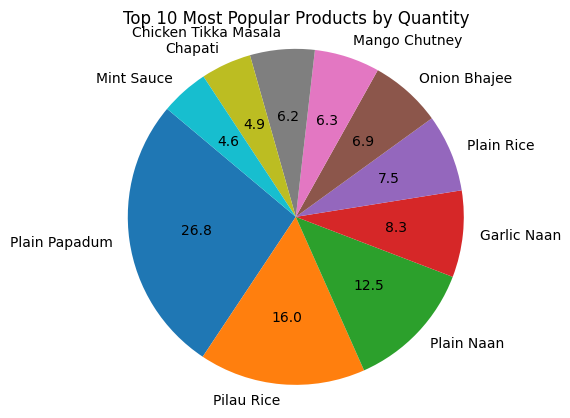

In [10]:
fig, ax = plt.subplots()
ax.pie(popularity_percentage, labels=top_10_products.index, autopct='%1.1f', startangle=140)
ax.set_title("Top 10 Most Popular Products by Quantity")
plt.axis('equal')
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

In [23]:
df


,order_id,order_datetime,product_id,product_price,product_name,product_quantity
0,1,2019-08-03 20:25:00,6,0.80,Plain Papadum,2
1,1,2019-08-03 20:25:00,240,12.95,King Prawn Balti,1
2,1,2019-08-03 20:25:00,19,2.95,Garlic Naan,1
3,1,2019-08-03 20:25:00,36,3.95,Mushroom Rice,1
4,1,2019-08-03 20:25:00,111,8.95,Paneer Tikka Masala,1
...,...,...,...,...,...,...
74813,3255,2016-05-18 18:53:00,247,17.95,House Red wine 75cl,2
74814,12905,2016-05-14 19:28:00,247,17.95,House Red wine 75cl,2
74815,3272,2016-05-10 13:18:00,247,17.95,House Red wine 75cl,2
74816,11404,2016-04-07 19:04:00,248,17.95,House white wine 75cl,1


In [32]:
df["total_price"] = df["product_price"] * df["product_quantity"]
df

,order_id,order_datetime,product_id,product_price,product_name,product_quantity,total_price
0,1,2019-08-03 20:25:00,6,0.80,Plain Papadum,2,1.60
1,1,2019-08-03 20:25:00,240,12.95,King Prawn Balti,1,12.95
2,1,2019-08-03 20:25:00,19,2.95,Garlic Naan,1,2.95
3,1,2019-08-03 20:25:00,36,3.95,Mushroom Rice,1,3.95
4,1,2019-08-03 20:25:00,111,8.95,Paneer Tikka Masala,1,8.95
...,...,...,...,...,...,...,...
74813,3255,2016-05-18 18:53:00,247,17.95,House Red wine 75cl,2,35.90
74814,12905,2016-05-14 19:28:00,247,17.95,House Red wine 75cl,2,35.90
74815,3272,2016-05-10 13:18:00,247,17.95,House Red wine 75cl,2,35.90
74816,11404,2016-04-07 19:04:00,248,17.95,House white wine 75cl,1,17.95


In [34]:
sorted_df = df.sort_values(by="total_price", ascending=False)
top_10 = sorted_df.head(10)
top_10

,order_id,order_datetime,product_id,product_price,product_name,product_quantity,total_price
73365,13379,2019-07-18 18:38:00,227,12.95,King Prawn Shaslick,51,660.45
61685,10287,2017-09-18 16:54:00,103,8.95,Chicken Tikka Masala,25,223.75
61683,10287,2017-09-18 16:54:00,157,8.95,Korma,25,223.75
69500,10287,2017-09-18 16:54:00,176,9.95,Chicken Biryani,20,199.00
69501,10287,2017-09-18 16:54:00,171,9.95,Vegetable Biryani,20,199.00
61684,10287,2017-09-18 16:54:00,111,8.95,Paneer Tikka Masala,20,179.00
47979,7143,2017-09-18 16:33:00,70,5.95,Royal Paneer,20,119.00
47978,10287,2017-09-18 16:54:00,65,5.95,Tarka Dall,20,119.00
35978,7143,2017-09-18 16:33:00,35,3.95,Meat Samosa,20,79.00
35979,7143,2017-09-18 16:33:00,28,3.95,Onion Bhajee,20,79.00


<function matplotlib.pyplot.show(close=None, block=None)>

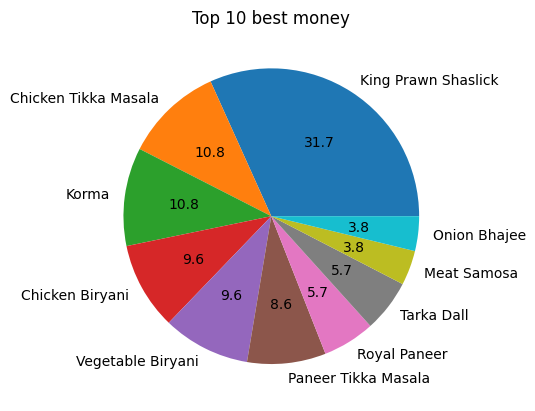

In [35]:
fig, ax = plt.subplots()
ax.pie(top_10["total_price"], labels=top_10["product_name"], autopct="%1.1f")
ax.set_title("Top 10 best money")
plt.show

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

In [65]:
df.head()


,order_id,order_datetime,product_id,product_price,product_name,product_quantity,total_price
0,1,2019-08-03 20:25:00,6,0.80,Plain Papadum,2,1.60
1,1,2019-08-03 20:25:00,240,12.95,King Prawn Balti,1,12.95
2,1,2019-08-03 20:25:00,19,2.95,Garlic Naan,1,2.95
3,1,2019-08-03 20:25:00,36,3.95,Mushroom Rice,1,3.95
4,1,2019-08-03 20:25:00,111,8.95,Paneer Tikka Masala,1,8.95


In [53]:
df.dtypes

order_id              int64
order_datetime       object
product_id            int64
product_price       float64
product_name         object
product_quantity      int64
dtype: object

In [54]:
df["order_datetime"] = pd.to_datetime(df["order_datetime"])

In [56]:
df.dtypes

order_id                     int64
order_datetime      datetime64[ns]
product_id                   int64
product_price              float64
product_name                object
product_quantity             int64
dtype: object

In [69]:
df["total_price"] = df["product_price"] * df["product_quantity"]
df_hourly = df.loc[:, ["order_datetime", "total_price"]]
df_hourly

,order_datetime,total_price
0,2019-08-03 20:25:00,1.60
1,2019-08-03 20:25:00,12.95
2,2019-08-03 20:25:00,2.95
3,2019-08-03 20:25:00,3.95
4,2019-08-03 20:25:00,8.95
...,...,...
74813,2016-05-18 18:53:00,35.90
74814,2016-05-14 19:28:00,35.90
74815,2016-05-10 13:18:00,35.90
74816,2016-04-07 19:04:00,17.95


In [76]:
df_hourly_sum = df_hourly.groupby(df_hourly["order_datetime"].dt.hour)["total_price"].sum().reset_index()
df_hourly_sum

,order_datetime,total_price
0,0,177.95
1,1,54.65
2,2,199.25
3,3,8.90
4,4,63.45
5,5,57.40
6,6,121.60
7,8,447.70
8,9,570.60
9,10,1250.35


<function matplotlib.pyplot.show(close=None, block=None)>

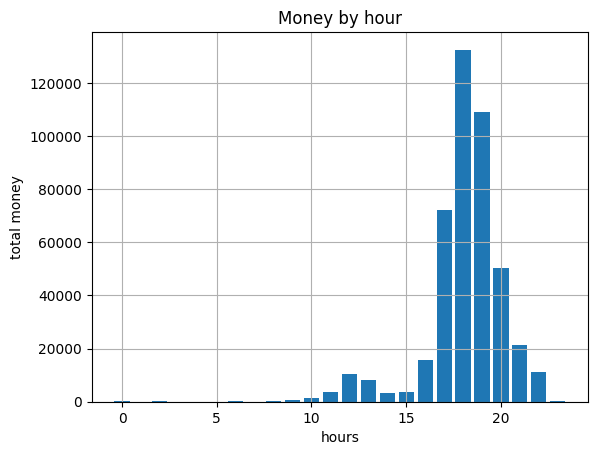

In [85]:
fig, ax = plt.subplots()
ax.bar(df_hourly_sum["order_datetime"], df_hourly_sum["total_price"])
ax.set_title("Profit by hour")
ax.set_ylabel("total money")
ax.set_xlabel("hours")
ax.grid()
plt.show

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

In [16]:
df.head()

,order_id,order_datetime,product_id,product_price,product_name,product_quantity
0,1,2019-08-03 20:25:00,6,0.80,Plain Papadum,2
1,1,2019-08-03 20:25:00,240,12.95,King Prawn Balti,1
2,1,2019-08-03 20:25:00,19,2.95,Garlic Naan,1
3,1,2019-08-03 20:25:00,36,3.95,Mushroom Rice,1
4,1,2019-08-03 20:25:00,111,8.95,Paneer Tikka Masala,1


In [20]:
df["total_price"] = df["product_price"] * df["product_quantity"]
df.head()

,order_id,order_datetime,product_id,product_price,product_name,product_quantity,total_price,day_of_week
0,1,2019-08-03 20:25:00,6,0.80,Plain Papadum,2,1.60,5
1,1,2019-08-03 20:25:00,240,12.95,King Prawn Balti,1,12.95,5
2,1,2019-08-03 20:25:00,19,2.95,Garlic Naan,1,2.95,5
3,1,2019-08-03 20:25:00,36,3.95,Mushroom Rice,1,3.95,5
4,1,2019-08-03 20:25:00,111,8.95,Paneer Tikka Masala,1,8.95,5


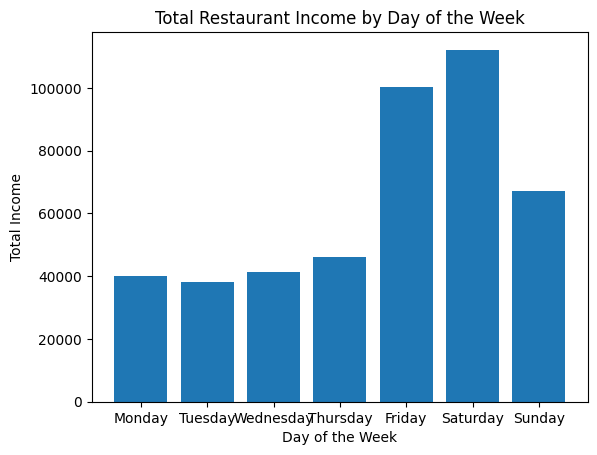

In [22]:
df['order_datetime'] = pd.to_datetime(df['order_datetime'])

df['day_of_week'] = df['order_datetime'].dt.dayofweek

income_by_day = df.groupby('day_of_week')['total_price'].sum()

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.bar(days_of_week, income_by_day)
plt.xlabel('Day of the Week')
plt.ylabel('Total Income')
plt.title('Total Restaurant Income by Day of the Week')
plt.show()